# Loading in our data from main.ipynb to build the initial model

### Loading the data

In [18]:
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np

with open("prepared_data.pkl", "rb") as f:
    data = pickle.load(f)

X_train = data["X_train"]
X_val = data["X_val"]
X_test = data["X_test"]
y_train = data["y_train"]
y_val = data["y_val"]
y_test = data["y_test"]
class_weights_dict = data["class_weights"]
num_classes = data["num_classes"]

### Data Normalization

In [19]:
X_train = X_train.astype("float32") / 255.0
X_val   = X_val.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

### Building the model

In [20]:
def leNet_model_iteration9(num_classes):
    model = Sequential()

    model.add(Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

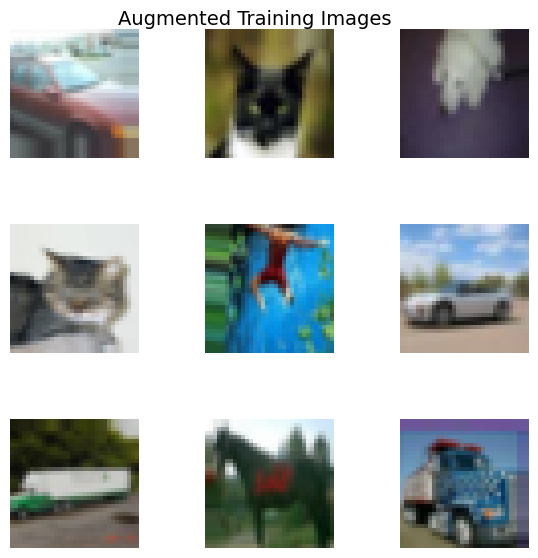

In [21]:
batch_size = 64
epochs = 50

def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    image = tf.image.resize_with_crop_or_pad(image, 36, 36)
    image = tf.image.random_crop(image, [32, 32, 3])

    return image, label


train_ds = (
    tf.data.Dataset.from_tensor_slices((X_train, y_train))
    .shuffle(10000)
    .map(augment, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)
)

val_ds = (
    tf.data.Dataset.from_tensor_slices((X_val, y_val))
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)
)

fig, axs = plt.subplots(3, 3, figsize=(6, 6))
fig.tight_layout()

for i in range(9):
    r = i // 3
    c = i % 3
    axs[r, c].imshow(X_batch[i])
    axs[r, c].axis('off')

plt.suptitle('Augmented Training Images', fontsize=14)
plt.show()

### Training the model

In [22]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=4,
    min_lr=1e-7,
    verbose=1
)

model = leNet_model_iteration9(num_classes)

history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weights_dict,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.2030 - loss: 2.5813 - val_accuracy: 0.3473 - val_loss: 2.0624 - learning_rate: 0.0010
Epoch 2/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.3719 - loss: 1.7645 - val_accuracy: 0.3780 - val_loss: 2.1672 - learning_rate: 0.0010
Epoch 3/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.4634 - loss: 1.4973 - val_accuracy: 0.5299 - val_loss: 1.4891 - learning_rate: 0.0010
Epoch 4/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.5372 - loss: 1.2934 - val_accuracy: 0.5767 - val_loss: 1.3503 - learning_rate: 0.0010
Epoch 5/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.5861 - loss: 1.1626 - val_accuracy: 0.6468 - val_loss: 1.1162 - learning_rate: 0.0010
Epoch 6/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.6199 - loss: 1.0557 - val_accuracy: 0.6382 - val_loss: 1.1339 - learning_rate: 0.0010
Epoch 7/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.6456 - l

### Evaluating the model

285/285 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8643 - loss: 0.4374
Test Loss: 0.60213702917099
Test Accuracy: 0.8323076963424683


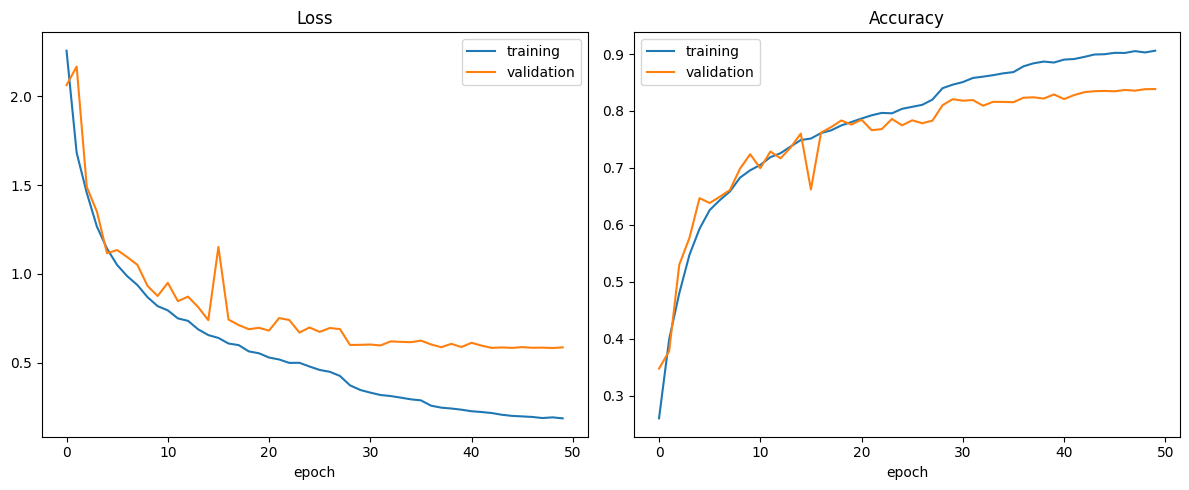

In [23]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

plt.figure(figsize=(12,5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title("Loss")
plt.xlabel("epoch")

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title("Accuracy")
plt.xlabel("epoch")

plt.tight_layout()
plt.show()


In [ ]:
# We referenced ChatGPT to help print out images from out dataset
class_names = [f"Class {i}" for i in range(num_classes)]

num_samples = 4
random_indices = np.random.choice(len(X_test), size=num_samples, replace=False)

plt.figure(figsize=(15, 5))

for i, idx in enumerate(random_indices):
    image = X_test[idx]
    true_label = y_test[idx]

    pred_probs = model.predict(np.expand_dims(image, axis=0))
    pred_label = np.argmax(pred_probs)

    plt.subplot(1, num_samples, i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}")

plt.show()